### SVM (Support Vector Machines) ###

Il metodo di classificazione SVM (Support Vector Machine) è una tecnica di apprendimento supervisionato, utilizzata per la classificazione e la regressione. La sua caratteristica principe è la capacità di trovare un iperpiano che separa i dati in due categorie diverse, con il massimo margine possibile, ovvero, l'SVM cerca il confine decisionale che massimizza la distanza tra i punti dati delle due classi più vicini al confine stesso, chiamati "support vectors". Questo metodo è particolarmente efficace in spazi ad alta dimensionalità e può essere esteso a problemi di classificazione non lineare utilizzando il 'Kernel Trick', che trasforma i dati originali in uno spazio di dimensioni superiori dove un iperpiano può separare le classi.

![Esempio di SVM su dati lineari](assets/lin-svm.jpg)

![Esempio di SVM su dati non lineari](assets/non-lin-svm.jpg)

Per ulteriori informazioni [1].

Come primo passo, si è caricato le librerie utili per l'esecuzione del codice.

Per fare ciò, si sono utilizzate le seguenti righe di codice:

In [1]:
# Load libraries
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC         
import seaborn as sns
import pandas as pd

Dopodichè, si è caricato il data set mediante il metodo **read_csv** della libreria Pandas,

mostrando le prime 5 righe.

In [2]:
# Load data
df = pd.read_csv(filepath_or_buffer="dataset/mushroom_cleaned.csv", sep=",")
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


Successivamente è seguita la fase di *Pre processing*, che è consistita in:

- Rimuovere eventuali valori NA presenti nel data set.

- Arrotondare alla seconda cifra decimale quelle colonne che presentavano valori non interi.

- Creare una serie di variabili *dummies* per quelle colonne di tipo categorico.

In [3]:
# Remove NA
df = df.dropna()

# Round to 2 decimal digits
df = df.round(2)

# One-hot encoding
df = pd.get_dummies(df, columns=['cap-shape', 'gill-attachment', 'gill-color', 'stem-color'])

Poi, è seguita la fase di preparazione dati, ovvero quella fase in cui i dati sono stati suddivisi in Train, Test e Validation set (questi ultimi solo per le reti neurali), 

utilizzando il 60% dei dati per il Test set, dato che la fase di Training, con più dati rispetto a quelli attuali, avrebbe richiesto troppo tempo.

Infine, i dati non obiettivo sono stati standardizzati, in modo tale da far lavorare l'algoritmo con un range di valori più basso rispetto a quello di partenza,

migliorando l'efficienza e le performance.

In [4]:
# Separate objective variable from others
X = df.drop('class', axis=1)
y = df['class']

# 30k rows for Test (whole dataset is too computationally expensive)
X, X_test, y, y_test = train_test_split(
    X,
    y,
    test_size=0.6,
    random_state=42,
    stratify=y,
    shuffle=True
)

# Split dataset: 
#   -Train set
#   -Validation set (NN only)
X_train, X_validation, y_train, y_validation = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42,
    stratify=y,
    shuffle=True 
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Validation shape:", X_validation.shape, y_validation.shape)

# Data Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

Train shape: (17291, 43) (17291,)
Test shape: (32421, 43) (32421,)
Validation shape: (4323, 43) (4323,)


Dopodichè, si è creata la griglia dei parametri da tunare, in modo tale da ottenere i migliori parametri per l'algoritmo **SVM**, su questo data set.

In [5]:
# Grid search with CV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Gamma coefficient for 'rbf' and 'poly'
    'degree': [2, 3]  # Degree of the polynomial for kernel 'poly'
}

In questa porzione di codice è stato creato il modello SVC (**SVM Classifier**) e istanziato l'oggetto **GridSearchCV** con i seguenti parametri: 

- svm: è il modello per cui si ricercano i migliori parametri.

- param_grid: la griglia dei parametri da tunare.

- 5: il numero dei k fold con cui deve lavorare la *Cross-Validation*.

- accuracy: è lo score con cui si base la *Grid search* per ottenere i migliori parametri.

- -1: indica di utilizzare tutti i Core disponibili della propria macchina.

In [6]:
# Create SVC model (SVM Classifier)
svm = SVC()
grid_search = GridSearchCV(
    estimator=svm, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)

Dopo, viene avviata la *Grid search*, attraverso il metodo **fit**, sui dati di Train.

In [7]:
# Fit
grid_search = grid_search.fit(X_train, y_train)

Qui vengono mostrati i migliori parametri trovati dall'algoritmo.

In [8]:
# Best parameters
print("Best parameters founded:", grid_search.best_params_)

Best parameters founded: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In seguito, vengono fatte le predizioni utilizzando il miglior modello ottenuto.

In [9]:
# Prediction
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

Successivamente, viene creata la matrice di confusione, la quale permette di avere un'idea generale della bontà del modello tramite una fase visiva.

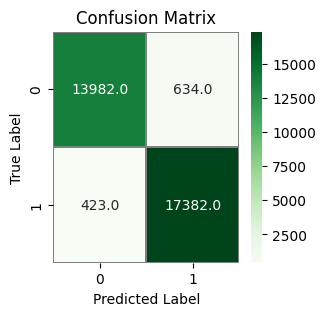

In [10]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
ax = plt.subplots(figsize=(3, 3))[1]
sns.heatmap(conf_matrix, annot=True, linewidths=0.01, cmap='Greens', linecolor='gray', fmt='.1f', ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Infine, viene riportata l'accuratezza del modello.

In [11]:
# Evaluation model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test loss: {1 - accuracy}')
print(f'Test Accuracy: {accuracy}')

Test loss: 0.03260232565312604
Test Accuracy: 0.967397674346874


### Neural Network ###

Le reti neurali sono modelli di apprendimento automatico ispirati alla struttura e al funzionamento del cervello umano. Sono composte da strati di nodi chiamati neuroni e quando uno di loro è connesso ad un altro, è presente un peso, parametro che indica l'importanza di tale connessione. Ogni neurone riceve input, lo elabora attraverso una funzione di attivazione e invia l'output ai neuroni dello strato successivo. Le reti neurali possono apprendere pattern complessi nei dati attraverso un processo di addestramento, durante il quale i pesi delle connessioni vengono ottimizzati usando algoritmi come la retropropagazione. Esistono vari tipi di reti neurali, come le reti neurali convoluzionali (CNN) per l'elaborazione delle immagini e le multilayer perceptron (MLP), cioè reti completamente connesse usate per la classificazione e regressione.

![Esempio di una MLP](assets/mlp.jpg)

Per ulteriori informazioni [2].

In primo luogo sono state importate le librerie utili alla manipolazione della rete neurale (oltre a quelle usate precedentemente).

In [ ]:
# Load libraries for NN
from keras.src.callbacks import EarlyStopping, ModelCheckpoint
from keras.src.layers import Dense
from keras import Model, Input
import numpy as np

In questa porzione di codice viene creato il modello di rete neurale e compilato.

La rete è formata da:

- 2 x livelli densi con 16 neuroni ciascuno, ovvero dove tutti i neuroni sono connessi con tutti gli altri.

- 1 x livello di output con un singolo neurone (classificazione binaria).

Ogni campione di input è un vettore di 'X_train.shape[1]' (= 43) dimensioni.

In [13]:
# Create model
inputs = Input(shape=(X_train.shape[1],))
x = Dense(16, activation="relu")(inputs)
x = Dense(16, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In seguito viene allenato il modello tramite il metodo **fit** e salvata la storia per plottare l'accuratezza e la perdita durante il training.

In [ ]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint(filepath='keras_model/best_model.keras', monitor='val_loss', save_best_only=True)
]

# Fit model
history = model.fit(
    x=X_train, 
    y=y_train,
    epochs=500,
    batch_size=32,
    validation_data=(X_validation, y_validation),
    callbacks=callbacks
)

Plot della accuratezza e della loss durante il training.

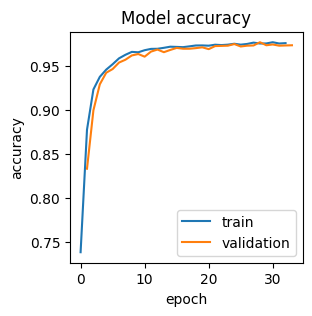

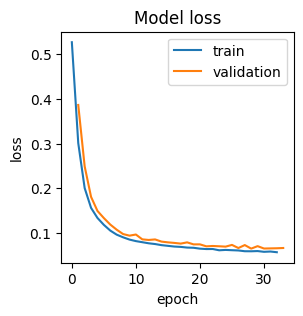

In [15]:
# Plotting accuracy (training + validation)
plt.subplots(figsize=(3, 3))
plt.plot(history.history['accuracy'])
plt.plot(np.arange(len(history.history['val_accuracy'])) + 1,   history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# Plotting loss (training + validation)
plt.subplots(figsize=(3, 3))
plt.plot(history.history['loss'])
plt.plot(np.arange(len(history.history['val_loss'])) + 1,   history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


Successivamente vengono eseguite le predizioni.

In [ ]:
# Prediction
y_pred = model.predict(X_test)

Dopodichè, viene creata la matrice di confusione.

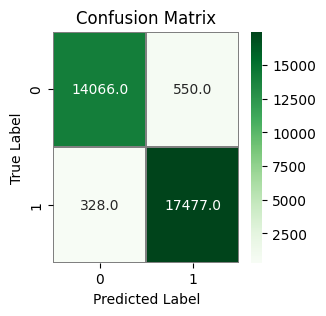

In [17]:
# Convert predictions classes 
y_pred = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 

# Plot the confusion matrix
f,ax = plt.subplots(figsize=(3, 3))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Infine, viene valutato il modello, mostrando l'accuratezza e la perdita.

In [18]:
# Evaluate model
results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {results[0]}')
print(f'Test Accuracy: {results[1]}')

Test Loss: 0.06579185277223587
Test Accuracy: 0.9729188084602356


## Bibliografia
1. https://www.datacamp.com/tutorial/support-vector-machines-r
2. https://www.vrogue.co/post/the-structure-of-a-multilayer-perceptron-neural-netwo-vrogue-co